## Annual Averages

Let's now begin with plotting the annual averages per unit of latitude and longitude. First, we must open the datafile and convert the temperature to celsius.

In [1]:
import xarray as xarr

# open datafile
dataFile = "./data/clipped_daily_pressure_1988.nc"
data = xarr.open_dataset(dataFile)

# kelvin -> celsius
data["t_celsius"] = data['t'] - 273.15

Then, let's process the data by determining the mean per unit of latitude and longtitude, as well as how the nationwide averages change over the year.

In [2]:
# calculate averages across continental US
mean_temp = data['t_celsius'].mean(dim='valid_time')
mean_clwc = data['clwc'].mean(dim='valid_time')

Then, in order to see how the nationwide average changes over the years, we need to calculate the weighted average with respect to each individual grid cell. For this, we'll reference the [CDO documentation](https://code.mpimet.mpg.de/projects/cdo).

In [ ]:
# using the climate data operators package
from cdo import Cdo
cdo = Cdo()

# define output file
outputFile = "./data/spatial_avgs.nc"

spatial_avg_file = cdo.fldmean(input=dataFile, output=outputFile)
spatial_avgs = xarr.open_dataset(outputFile)

# calculate nationwide average across the year
temp_timeseries = spatial_avgs["t"] - 273.15 # need to convert again
clwc_timeseries = spatial_avgs["clwc"]

temp_timeseries = temp_timeseries.squeeze()
clwc_timeseries = clwc_timeseries.cumsum(dim="time")

Now, we can plot the annual average temperature across the continental United States ([using Cartopy and this reference](https://www.atmos.albany.edu/facstaff/ktyle/atm533_2022/core/week3/cartopy.html)).

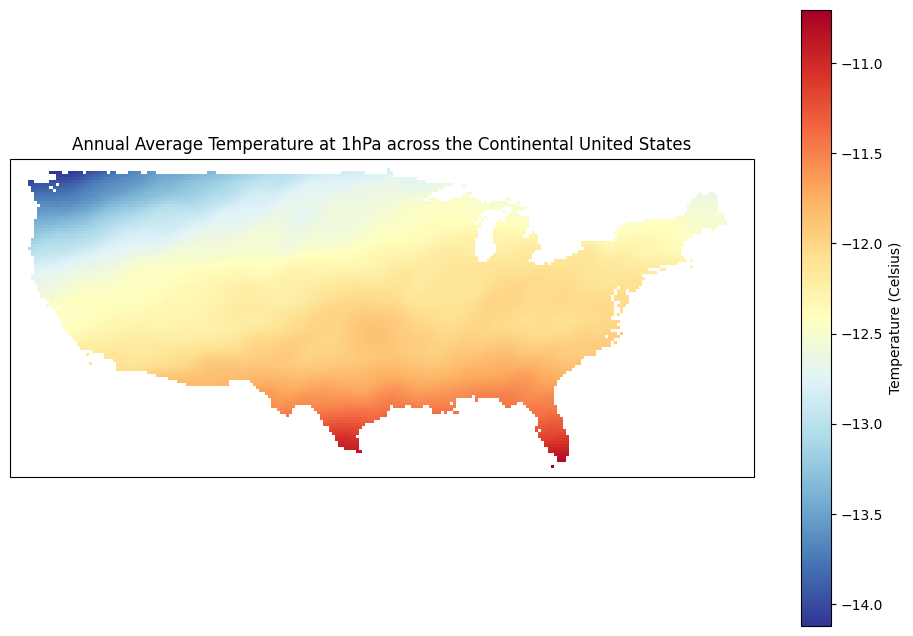

In [4]:
import matplotlib.pyplot as plot
import cartopy.crs as ccrs

# declare figure
theFigure = plot.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# make map, adjust colorbar
temp_plot = mean_temp.plot(transform=ccrs.PlateCarree(), cmap="RdYlBu_r", add_colorbar=True)
temp_plot.colorbar.set_label("Temperature (Celsius)")

# plot, save, show
plot.title("Annual Average Temperature at 1hPa across the Continental United States")
plot.savefig("./plots/Annual_Average_Heatmap_Temp_1hPa_CONUS.png")
plot.show()

Let's do same for the average cloud water content.

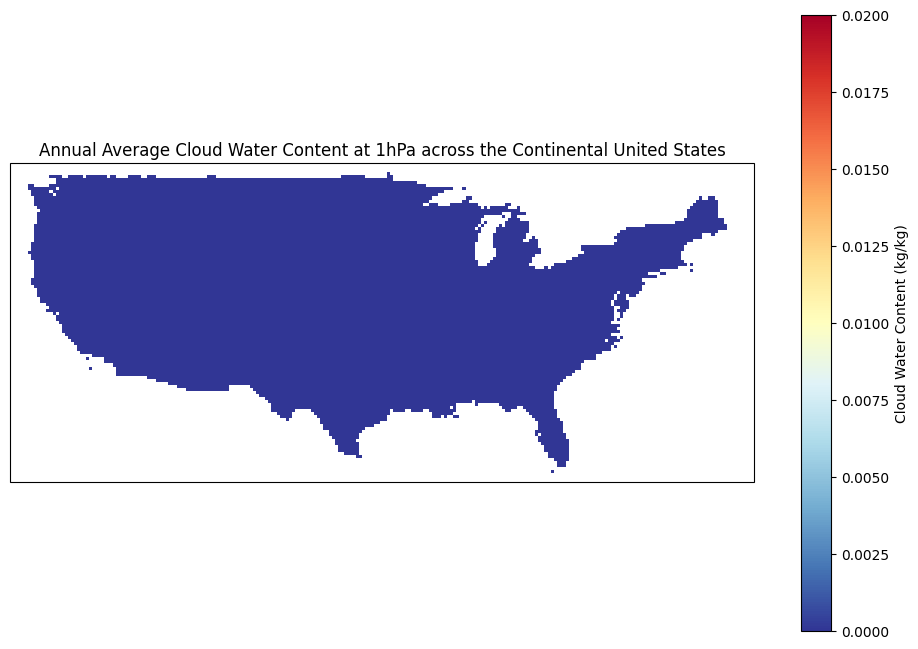

In [5]:
# declare figure
theFigure = plot.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# make map, adjust colorbar
clwc_plot = mean_clwc.plot(transform=ccrs.PlateCarree(), cmap="RdYlBu_r", vmin=0, vmax=0.02, add_colorbar=True)
clwc_plot.colorbar.set_label("Cloud Water Content (kg/kg)")

# plot, save, show
plot.title("Annual Average Cloud Water Content at 1hPa across the Continental United States")
plot.savefig("./plots/Annual_Average_Heatmap_CWLC_1hPA_CONUS.png")
plot.show()

(The altitude at which the pressure is 1hPa is so extreme that there is essentially zero cloud water content; hence, the near-uniform graph.)

We can also plot the annual average across the entire continental United States with a graph that shows how the temperature changes with time.

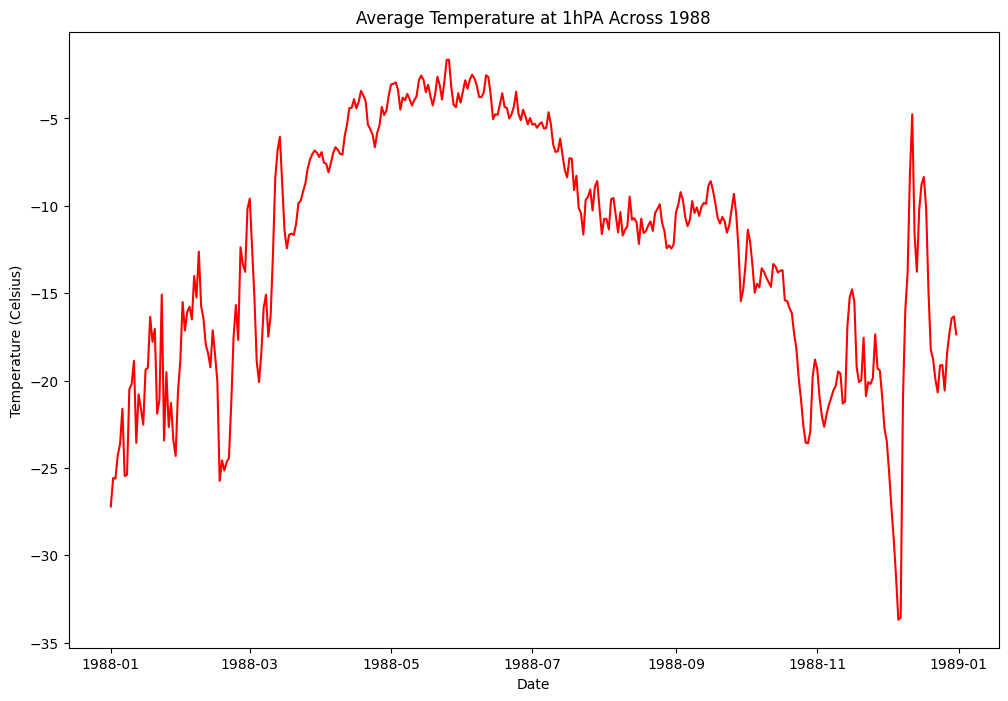

In [6]:
# create figure
theFigure = plot.subplots(figsize=(12,8))

# need to pass in the times, and then the data
plot.plot(temp_timeseries.valid_time, temp_timeseries, color="red")

# labels
plot.ylabel("Temperature (Celsius)")
plot.xlabel("Date")
plot.title("Average Temperature at 1hPA Across 1988")
plot.savefig("./plots/Average_Temperature_TimeSeries_1hPA_CONUS.png")
plot.show()

Finally, let's plot, save, and show the time series for the average cloud water content at 1hPa in 1988 across the continental United States.

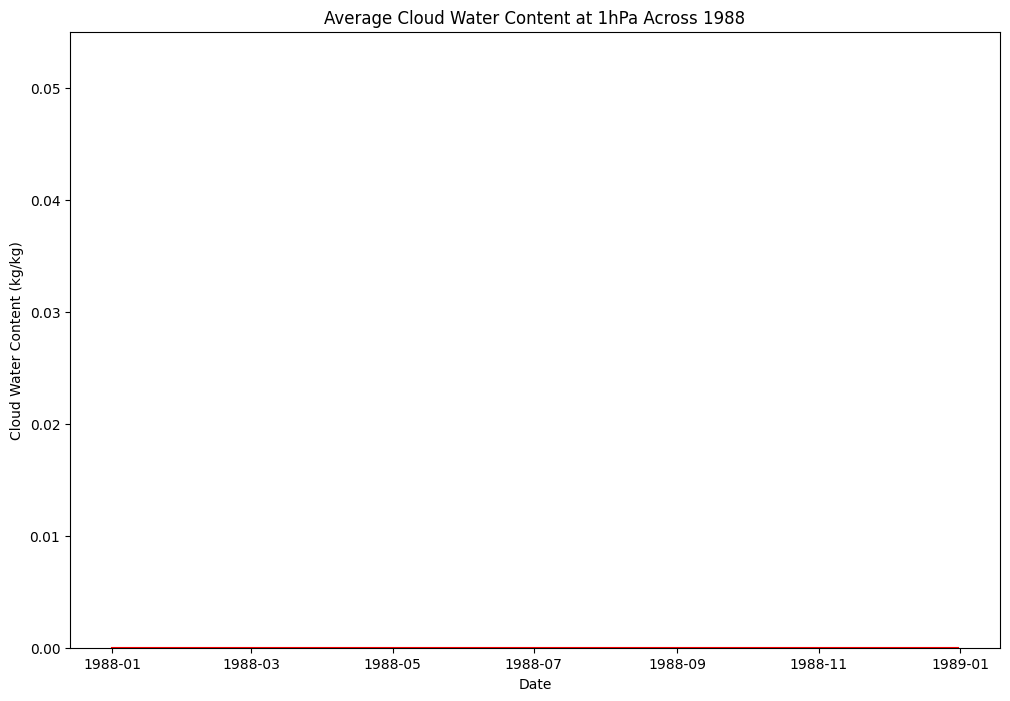

In [7]:
theFigure = plot.subplots(figsize=(12,8))
plot.plot(clwc_timeseries.valid_time, clwc_timeseries, color="red")
plot.ylabel("Cloud Water Content (kg/kg)")
plot.xlabel("Date")
plot.ylim(bottom=0)
plot.title("Average Cloud Water Content at 1hPa Across 1988")
plot.savefig("./plots/Average_CLWC_TimeSeries_1hPa_CONUS_1988.png")
plot.show()

(Once again, at that pressure, the cloud water content is so little you can't observe it on this graph.)